In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')

from data import *

Using TensorFlow backend.


In [2]:
train_path = "../640x400_small"
image_folder = "train"
label_folder = "trainannot"
valid_path =  "../640x400_small"
valid_image_folder ="val"
valid_label_folder = "valannot"
test_image_folder ="../640x400_small/test"
test_label_folder = "../640x400_small/testannot"
log_filepath = '../log'
flag_multi_class = True
num_classes = 4

In [3]:
dp = data_preprocess(
    train_path=train_path,image_folder=image_folder,label_folder=label_folder,
    valid_path=valid_path,valid_image_folder=valid_image_folder,valid_label_folder=valid_label_folder,
    flag_multi_class=flag_multi_class, num_classes=num_classes, img_rows=640, img_cols=400,
    test_path=test_image_folder
)

## Train Generator

In [4]:
img, lb = next(dp.trainGenerator(1))
img.shape, lb.shape

Found 421 images belonging to 1 classes.
Found 421 images belonging to 1 classes.


((1, 640, 400, 3), (1, 640, 400, 3))

In [5]:
np.unique(lb[0]) # datos normalizados

array([0.0000000e+00, 2.9799062e-06, 1.2663999e-04, ..., 9.9844867e-01,
       9.9850899e-01, 1.0000000e+00], dtype=float32)

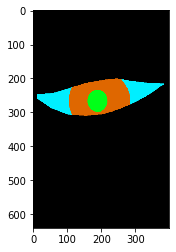

In [6]:
plt.imshow(lb[0]) # se ve bien, esta en rgb

In [7]:
np.unique(img[0]) # datos normalizados

array([0.00392157, 0.00393541, 0.00395589, ..., 0.9999989 , 0.9999995 ,
       1.        ], dtype=float32)

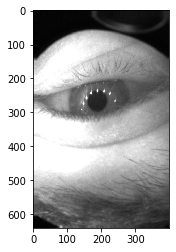

In [8]:
plt.imshow(img[0]) # se ve bien, rgb

## Test Generator

In [9]:
img= next(dp.testGenerator())
img.shape

(1, 640, 400, 3)

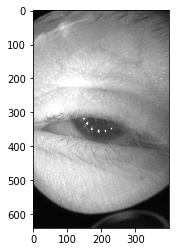

In [10]:
plt.imshow(img[0])

## Val Generator

In [15]:
val = dp.validLoad(batch_size=1)
img, lb = next(val)
img.shape, lb.shape

Found 112 images belonging to 1 classes.
Found 112 images belonging to 1 classes.


((1, 640, 400, 3), (1, 640, 400, 3))

In [17]:
np.unique(img[0])

array([0.00872718, 0.00883391, 0.00972258, ..., 0.9999997 , 0.9999999 ,
       1.        ], dtype=float32)

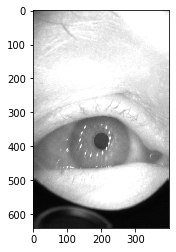

In [18]:
plt.imshow(img[0])

In [19]:
np.unique(lb[0])

array([0.0000000e+00, 9.4403185e-05, 1.3136325e-04, ..., 9.9975550e-01,
       9.9984980e-01, 1.0000000e+00], dtype=float32)

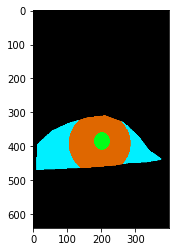

In [20]:
plt.imshow(lb[0])